# Mode-Turbulence Coupling: Numerical Analysis

In [192]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [193]:
from scipy import integrate
import random
from scipy.integrate import quad
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import math

## Generate delta T

#### To generate values for deta T, I created a Rayleigh distribution. I then used the inverse transform sampling to randomly generate values for delta T.

### Rayleigh Distribution
#### Source: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.rayleigh.html

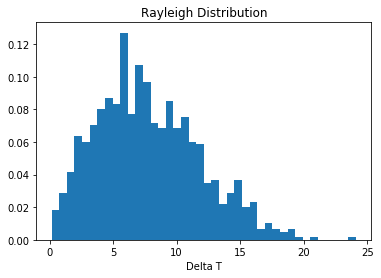

In [194]:
rayleigh = np.random.rayleigh(2*np.pi, 1000)
count, bins, ignored = plt.hist(rayleigh, 40, density=True)
plt.title("Rayleigh Distribution")
plt.xlabel("Delta T")
plt.show()

### Inverse Transform Sampling
#### Source: https://tmramalho.github.io/blog/2013/12/16/how-to-do-inverse-transformation-sampling-in-scipy-and-numpy/

In [250]:
import scipy.interpolate as interpolate
                               
n_bins=40 
n_samples=30
hist, bin_edges = np.histogram(rayleigh, bins=n_bins, density=True)
cum_values = np.zeros(bin_edges.shape)
cum_values[1:] = np.cumsum(hist*np.diff(bin_edges))
inv_cdf = interpolate.interp1d(cum_values, bin_edges)
r = np.random.rand(n_samples)
deltaT=inv_cdf(r)

print(deltaT)

[ 4.47457457  2.319425   13.13030181  7.21301712 10.64504668  6.31773697
  7.15292699  5.72800601  1.25183473  9.12268415  8.63117923 14.1425633
 11.10138275  9.39642054 12.05469177  2.656805    1.58166149 11.84266641
  9.64811158  1.77691196 15.50052222  6.64834568  1.77279743 14.16314928
  4.57172557  6.19877551  4.51303319  9.89294914  9.50169544  1.01005462]


In [251]:
# Tturb adds up the delta T's
Tturb=[0]
for i in range(len(deltaT)-1):
    Tturb.append(deltaT[i]+Tturb[i])
print("Tturb values are:", Tturb)

Tturb values are: [0, 4.474574573538515, 6.793999570310738, 19.924301379737944, 27.137318497113935, 37.78236517582988, 44.1001021424059, 51.25302912853525, 56.981035136793594, 58.23286986415019, 67.35555400942071, 75.98673323559349, 90.12929653378205, 101.23067928657582, 110.62709982941661, 122.68179160214308, 125.33859659754171, 126.92025808402806, 138.76292449764816, 148.4110360753926, 150.187948033265, 165.68847025027847, 172.33681592680003, 174.10961336037929, 188.27276264146553, 192.84448821428137, 199.04326372482976, 203.55629691638683, 213.44924606130732, 222.95094150160807]


In [252]:
# t is the sum of half way points of consecutive delta T's
t=[]
for i in range(len(deltaT)-1):
    t.append((deltaT[i])/2+(deltaT[i+1])/2)
print("t values are:", t)

t values are: [3.396999785155369, 7.7248634030997145, 10.1716594634016, 8.92903189804597, 8.481391822645984, 6.735331976352684, 6.440466497193846, 3.4899203678074677, 5.187259436313559, 8.876931685721647, 11.386871262180664, 12.621973025491162, 10.248901647817274, 10.725556157783625, 7.355748384062551, 2.1192332409424894, 6.712163950053218, 10.74538899568226, 5.712511767808426, 8.638717087442942, 11.074433946767504, 4.2105715550504055, 7.967973357332755, 9.367437426951046, 5.385250541682122, 5.355904351052727, 7.202991168238775, 9.697322292610616, 5.255875032080346]


## Generate F1


F1 values are [0.021240359704917056, -0.1701127655405763, 0.2951118781924212, -0.1706377961096195, 0.13945306738774826, -0.13700142577721364, 0.16751594460718935, 0.026912689596562428, -0.011034122690058296, -0.15924771666982027, 0.09341717712513964, 0.18385359522749978, 0.2794694954219697, -0.27565214805632077, 0.2842721920270546, -0.07239118050356205, 0.16566605142184518, -0.009675013707538371, 0.28113341466528574, 0.08070801990068194, -0.19659722679479724, 0.15136092645500981, 0.15054820422120724, 0.21299549502151044, 0.17162966066730542, 0.12289425108358298, 0.17915429677570283, 0.27626320831680307, 0.03263334342710539]


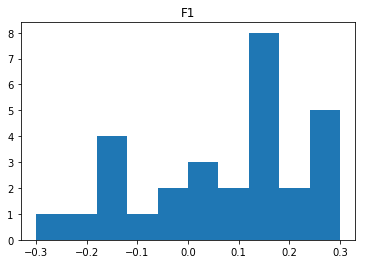

In [253]:
import random

mean = 0
std =.3
Tr=2*np.pi

y1=.1
F1=[]
prob=[]

for i in range(len(t)):
    arr=[]
    a=t[i]
    stdevt=((1-math.exp(-2*a/Tr))*std**2)**(1/2)
    meant=math.exp(-a/Tr)*y1
    R=random.uniform(0,1)
    F1.append(meant-stdevt+2*stdevt*R)
print("F1 values are", F1)

plt.hist(F1, 10, range=(-std, std))
plt.title("F1")
plt.show()

## Generate F2


F2 values are [-0.011904804071442517, -0.013181220110674893, 0.058282092611899844, -0.07383272742768829, 0.008037657485234578, 0.07877373717464038, -0.03877273836263069, -0.06368560911221388, 0.015616553048225554, 0.08461521197616394, -0.08584683490931545, -0.02738258275056412, -0.06113966692761762, 0.03419988680215044, -0.01405333434422533, -0.04633783481645672, -0.047489535126052425, 0.08278095524372012, -0.045808708797958786, 0.010802066796718787, 0.015305230105646508, -0.057086178037309386, -0.0797247899709411, -0.05207557644538633, 0.04393855854739229, 0.0786715426253405, -0.00200124803851634, 0.036014296115214825, 0.040076529439910455]


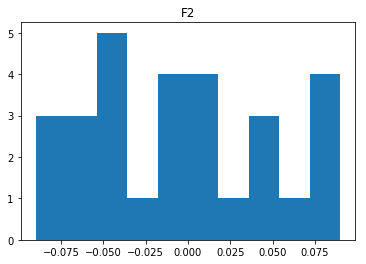

29


In [254]:
mean = 0
std =.09
Tr=2*np.pi

y1=.01
F2=[]

for i in range(len(t)):
    arr=[]
    a=t[i]
    stdevt=((1-math.exp(-2*a/Tr))*std**2)**(1/2)
    meant=math.exp(-a/Tr)*y1
    R=random.uniform(0,1)
    F2.append(meant-stdevt+2*stdevt*R)
print("F2 values are", F2)

plt.hist(F2, 10, range=(-std, std))
plt.title("F2")
plt.show()
print(len(F2))

## Generate G1
#### To Generate G1, I take the derivative of F1 by taking the difference of F1 values at times halfway between consecutive delta T's and divide that by the difference in those times.

G1 values are  [0, -0.028165018744141814, 0.030112159882744287, -0.022894478328626868, 0.017364192839608293, -0.01629770790843589, 0.02260596593111845, -0.010915611087480131, -0.005436630107187904, -0.014286310121890997, 0.014231544341011768, 0.003971082838300262, 0.003787676459194033, -0.02708200656782162, 0.02610234526985501, -0.024243853508052762, 0.05616588757817326, -0.013061440873177222, 0.013531777606640276, -0.01754266799887013, -0.01605014054103961, 0.015709974655245106, -9.65097283322201e-05, 0.00391864329860204, -0.0022079589363037224, -0.004524897143271962, 0.005252151831376682, 0.006740873983665083, -0.012561708146760485]


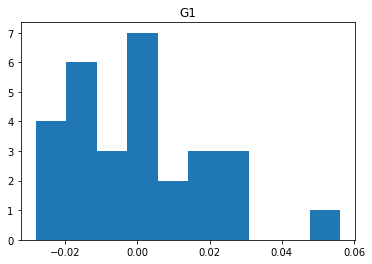

29


In [255]:
G1=[0]
for i in range(len(F1)-1):
    G1.append((F1[i+1]-F1[i])/(deltaT[i]+deltaT[i+1]))
print("G1 values are ", G1)

plt.hist(G1, 10)
plt.title("G1")
plt.show()
print(len(G1))

## Graph of Amplitude

In [256]:
#F2=constant=c
#1+G1=constant=b
#F1=constant=a

Text(0.5, 1.0, 'Amplitude of the Mode')

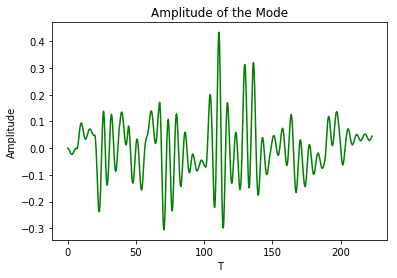

In [257]:
A=[]
t=[]
derivA=[]

##initial conditions A(0)=0, dA/dT(0)=0
dAdT=0
AT=0
## a**2<4*b is always the case
for i in range(len(Tturb)-1):
    a=F1[i]
    b=G1[i]+1
    c=F2[i]
    Ttemp=np.linspace(Tturb[i], Tturb[i+1])
    q=1/2*(4*b-a**2)**(1/2)
    C0=(math.exp(a*Tturb[i]/2)*dAdT+(a/2+q*math.tan(q*Tturb[i]))*(AT-c/b)*(math.exp(a*Tturb[i]/2)))*(math.cos(q*Tturb[i])/q)
    C1=(AT-c/b)*math.exp(a*Tturb[i]/2)/math.cos(q*Tturb[i])-C0*math.tan(q*Tturb[i])
    for j in Ttemp:
        if j==Tturb[i]:
            pass
        else:
            t.append(j)
            A.append(math.exp(-a*j/2)*(C0*math.sin(q*j)+C1*math.cos(q*j))+c/b)
            derivA.append(math.exp(-a*j/2)*(-a/2*(C0*math.sin(q*j)+C1*math.cos(q*j))+q*C0*math.cos(q*j)-q*C1*math.sin(q*j)))
    dAdT=derivA[-1]
    AT=A[-1]
    
#check that derivative is correct
plt.plot(t, A, 'g')
plt.xlabel('T')
plt.ylabel('Amplitude')
plt.title('Amplitude of the Mode')

## Check that derivative is correct for the first three eddies

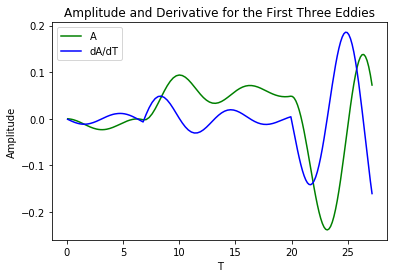

In [259]:
#FIRST EDDY TURNOVER
#check that derivative is correct

A=[]
t=[]
derivA=[]

dAdT=0
AT=0
## a**2<4*b is always the case
for i in range(4):
    a=F1[i]
    b=G1[i]+1
    c=F2[i]
    Ttemp=np.linspace(Tturb[i], Tturb[i+1])
    q=1/2*(4*b-a**2)**(1/2)
    C0=(math.exp(a*Tturb[i]/2)*dAdT+(a/2+q*math.tan(q*Tturb[i]))*(AT-c/b)*(math.exp(a*Tturb[i]/2)))*(math.cos(q*Tturb[i])/q)
    C1=(AT-c/b)*math.exp(a*Tturb[i]/2)/math.cos(q*Tturb[i])-C0*math.tan(q*Tturb[i])
    for j in Ttemp:
        if j==Tturb[i]:
            pass
        else:
            t.append(j)
            A.append(math.exp(-a*j/2)*(C0*math.sin(q*j)+C1*math.cos(q*j))+c/b)
            derivA.append(math.exp(-a*j/2)*(-a/2*(C0*math.sin(q*j)+C1*math.cos(q*j))+q*C0*math.cos(q*j)-q*C1*math.sin(q*j)))
    dAdT=derivA[-1]
    AT=A[-1]
    tend=t[-1]
    
plt.plot(t, A, 'g', label="A")
plt.plot(t, derivA, 'b', label="dA/dT")
plt.xlabel('T')
plt.ylabel('Amplitude')
plt.title('Amplitude and Derivative for the First Three Eddies')
plt.legend()